<a href="https://colab.research.google.com/github/Sidhtang/machine-learining-with-CN/blob/main/cnn_with_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/5
1875/1875 [==============================] - 173s 90ms/step - loss: 0.1544 - accuracy: 0.9537 - val_loss: 0.0443 - val_accuracy: 0.9861
Epoch 2/5
1875/1875 [==============================] - 163s 87ms/step - loss: 0.0544 - accuracy: 0.9835 - val_loss: 0.0350 - val_accuracy: 0.9884
Epoch 3/5
1875/1875 [==============================] - 162s 86ms/step - loss: 0.0402 - accuracy: 0.9875 - val_loss: 0.0306 - val_accuracy: 0.9899
Epoch 4/5
1875/1875 [==============================] - 160s 85ms/step - loss: 0.0314 - accuracy: 0.9903 - val_loss: 0.0299 - val_accuracy: 0.9899
Epoch 5/5
1875/1875 [==============================] - 163s 87ms/step - loss: 0.0280 - accuracy: 0.9909 - val_loss: 0.0259 - val_accuracy: 0.9915
313/313 - 6s - loss: 0.0259 - accuracy: 0.9915 - 6s/epoch - 18ms/step

Test accuracy: 0.9915000200271606
313/313 [==============================] - 8s 25ms/step


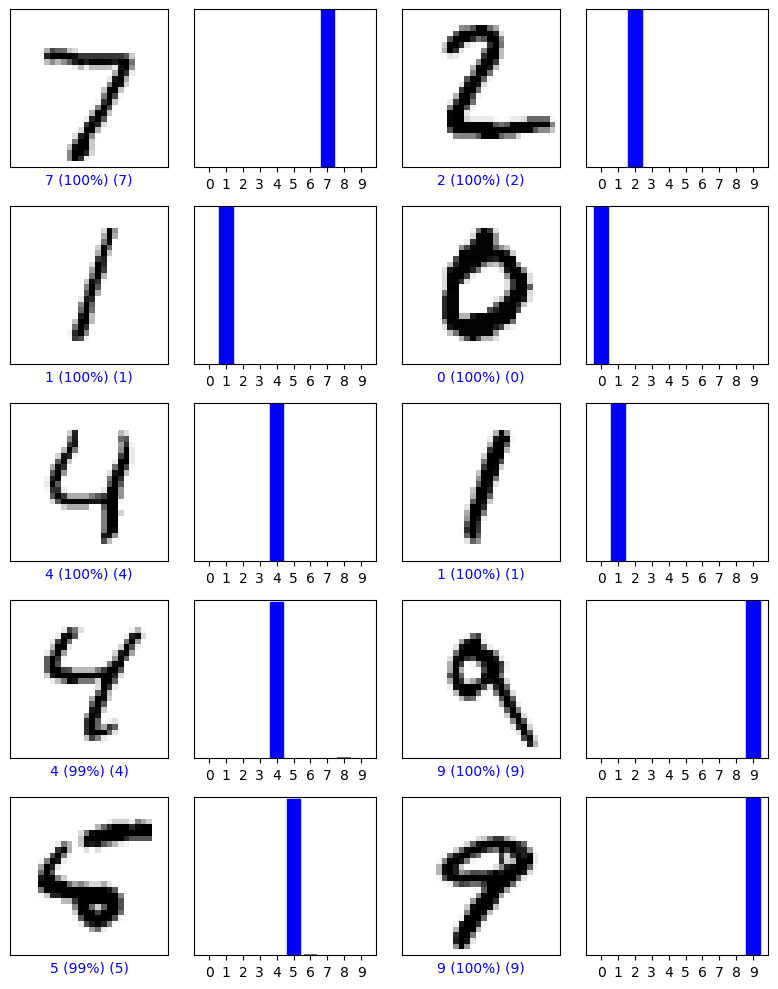

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape data to fit the model
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Define the model using the provided layers
inpx = Input(shape=(28, 28, 1))
layer1 = layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = layers.Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = layers.MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = layers.Dropout(0.5)(layer3)
layer5 = layers.Flatten()(layer4)
layer6 = layers.Dense(250, activation='sigmoid')(layer5)
layer7 = layers.Dense(10, activation='softmax')(layer6)

model = models.Model(inputs=inpx, outputs=layer7)

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Make predictions
predictions = model.predict(x_test)

# Display some predictions with the images
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[..., 0], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{predicted_label} ({100 * np.max(predictions_array):2.0f}%) ({true_label})", color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Plot the first 5 test images, their predicted labels, and the true labels
num_rows = 5
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_test, x_test)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()
